# Lesson 3: 16 August 2018 John W.

In [1]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

2)Find the number of seconds in June and between 1 Jun at noon and 14 Aug at 0930.

In [2]:
sec_per_min = 60
min_per_hr = 60
hr_per_day = 24

June = 30*hr_per_day*min_per_hr*sec_per_min
June



2592000

In [3]:
jun1 = 12*min_per_hr*sec_per_min
jun = 29*hr_per_day*min_per_hr*sec_per_min
jul = 31*hr_per_day*min_per_hr*sec_per_min
aug = 13*hr_per_day*min_per_hr*sec_per_min
aug14 = 9.5*min_per_hr*sec_per_min

total_seconds = jun1+jun + jul + aug + aug14
total_seconds

6384600.0

3) Import a table and find data.

In [4]:
Population = Table.read_table('world_population.csv')

3 a. Find population in 2015

In [5]:
Population.take(65)

Population
7256490011


3 b. Find the population growth between 1950 and 2015.

Population.take(0).column('Population')[0]

This takes the 0th row of the table, extracted the array stored in the Population column, and took the value out of the 0th element of the array.

In [6]:
pop1950 = int(Population.take(0).column('Population')[0])
pop2015 = int(Population.take(65).column('Population')[0])

Pop_growth = pop2015 - pop1950
Pop_growth

4698861357

3 c. The average annual growth rate. Look to notes for where this comes from.

In [7]:
Av_Grow_rate = (pop2015/pop1950)**(1/65) - 1
Av_Grow_rate

0.01617270380658975

4) Import Titanic Data

In [8]:
Titanic = Table.read_table('Titanic.csv')

4 a. Relabel the Pclass column to passenger_class

In [14]:
Titanic.relabel('Pclass','passenger_class')

ValueError: Invalid labels. Column labels must already exist in table in order to be replaced.

4 b. Create a new column that adds the number of siblins and spouses to the number of children.

In [63]:
SS = Titanic.column('SibSp')
Ch = Titanic.column('Parch')
Fam_Size = SS + Ch 

Fam = Titanic.with_column('family_size',Fam_Size)
Fam

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


4 c. Create a barplot of passengers, broken down by passenger class.

In [33]:
Bar_Data = Titanic.group('passenger_class')


passenger_class,count
1,216
2,184
3,491


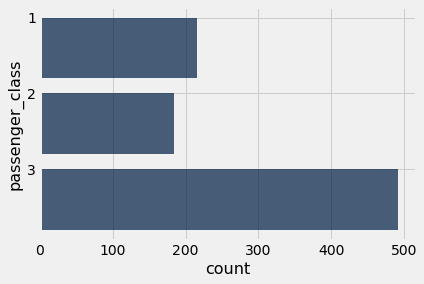

In [39]:
Bar_Data.barh('passenger_class','count')

4 d. Sort the data by age and show the 5 youngest passengers.

In [42]:
Age = Titanic.sort('Age')
Age.show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S


4 e. Sort from oldest to younges and get rid of nan age data.

In [56]:
Old = Titanic.sort('Age',descending = True)
Old = Old.exclude[:177]
Old.show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q


4 f. Find the survival rate for passengers of the Titanic, broken down by passenger class.

In [59]:
Survivors = Titanic.where('Survived')
Surv_class = Survivors.group('passenger_class')

Total = Bar_Data.column('count')
Survived = Surv_class.column('count')
Surv_Rate = Survived/Total 

Surv_class.with_column('Survival_Rate',Surv_Rate)

passenger_class,count,Survival_Rate
1,136,0.62963
2,87,0.472826
3,119,0.242363


4 g. Create two of my own questions and answer them:
1. How many of those with family survived and how many did not?
2. How much was the average cost of a ticket for each class?

In [64]:
Have_Fam = Fam.where('family_size')
Have_Fam.group('Survived')



Survived,count
0,175
1,179


In [76]:
Cost = Titanic.select('Fare','passenger_class')
Cost = Cost.sort('passenger_class')

First = Cost.take[:215]
Second = Cost.take[216:(216+184)]
Third = Cost.take[(216+185):]

First_Cost = sum(First.column('Fare'))
Second_Cost = sum(Second.column('Fare'))
Third_Cost = sum(Third.column('Fare'))

Ave1 = First_Cost/216
Ave2 = Second_Cost/184
Ave3 = Third_Cost/491

Ave1 


84.01579861111104

In [78]:
Ave2

20.66218315217391

In [79]:
Ave3

13.660784317718946